### Exploratory Data Analysis (EDA) for M&E

Hadley Wickham's approach to EDA:  
![image of the data flow showing visualization as an exploratory and iterative process](http://benbestphd.com/images/r4ds_data-science.png)

#### The goal of EDA is to discover patterns in data. This is a fundamental stepping stone towards predictive modelling, or an end goal in itself. 

Tips for good EDA:
- Understand the context. 
- Use graphical representations of data
- Develop models in an iterative process of tentative model specification and residual assessment 
- Question the data: Who collected it? Who is distributing it? Do all of the patterns make sense to what you know about the world? If they don’t, go back and look more closely at your data.
- Don’t think of EDA as an initial step. 


## Goals:
- Load data (why using tools like python are better than Excel)
- Viewing data and getting an idea of the structure of our data using pandas
- Querying the data for basic info (how many of X value do we see in Y column)
- Descriptive statistics in pandas

In [5]:
#imports a bunch of packages
import pandas as pd #pandas is the package we're going to be using the most of!
import matplotlib.pyplot as plt #matplotlib is a great plotting library
plt.style.use('ggplot') #this adds a customised style to my plots
import seaborn as sn #seaborn gives us a few more plotting options
%matplotlib inline
#this makes sure my plots show up! but isn't currently working! it will need to be troubleshot!

In [6]:
#we'll start off by loading our dataset
#pandas makes it incredibly easy to load CSVs, tabular data, json files, etc. 
#pandas can read a file from a local computer or directly from a URL
df = pd.read_csv('../../Documents/us_foreign_aid_complete.csv') #assign the CSV that we're working with to the variable 'df'

C:\Users\rb\AppData\Local\Temp\ipykernel_13568\3876368768.py:4: DtypeWarning: Columns (6,7,12,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Documents/us_foreign_aid_complete.csv') #assign the CSV that we're working with to the variable 'df'


In [7]:
df.head() #this command lets us see the first 5 rows of data

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
0,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,2,Obligations,2006,01MAR2006,37760,54932,13,Technical Cooperation - Other,.,30831
1,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01MAR2006,983,1430,13,Technical Cooperation - Other,.,30831
2,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01MAY2006,3392,4935,13,Technical Cooperation - Other,.,30831
3,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01JUL2006,5001,7275,13,Technical Cooperation - Other,.,30831
4,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,...,3,Disbursements,2006,01AUG2006,4257,6193,13,Technical Cooperation - Other,.,30831


In [8]:
df.tail(10) #this lets us see the last 10 rows -- 5 is the default but you can specify a number in the parentheses and pull a specific number

,Country ID,Country Code,Country Name,Region ID,Region Name,Income Group ID,Income Group Name,Income Group Acronym,Managing Agency ID,Managing Agency Acronym,...,Transaction Type ID,Transaction Type Name,Fiscal Year,Transaction Date,Current Dollar Amount,Constant Dollar Amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
3734989,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2001,NaN,8311000,13641573,13,Technical Cooperation - Other,.,11
3734990,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2002,NaN,9831000,15886552,13,Technical Cooperation - Other,.,11
3734991,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2003,NaN,12956000,20542134,13,Technical Cooperation - Other,.,11
3734992,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2004,NaN,18683000,28916366,13,Technical Cooperation - Other,.,11
3734993,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2005,NaN,16672000,25041849,13,Technical Cooperation - Other,.,11
3734994,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2006,NaN,16315000,23734621,13,Technical Cooperation - Other,.,11
3734995,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2007,NaN,18518000,26217725,13,Technical Cooperation - Other,.,11
3734996,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2008,NaN,19510000,27060399,13,Technical Cooperation - Other,.,11
3734997,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2009,NaN,25550000,35079164,13,Technical Cooperation - Other,.,11
3734998,1072,ANT,Netherlands Antilles (former),6,Western Hemisphere,NaN,NaN,NaN,7,DOD,...,3,Disbursements,2010,NaN,25677000,34950841,13,Technical Cooperation - Other,.,11


In [9]:
#we can take a look at what each column is without having to scroll
df.columns

Index(['Country ID', 'Country Code', 'Country Name', 'Region ID',
       'Region Name', 'Income Group ID', 'Income Group Name',
       'Income Group Acronym', 'Managing Agency ID', 'Managing Agency Acronym',
       'Managing Agency Name', 'Managing Sub-agency or Bureau ID',
       'Managing Sub-agency or Bureau Acronym',
       'Managing Sub-agency or Bureau Name',
       'Implementing Partner Category ID',
       'Implementing Partner Category Name',
       'Implementing Partner Sub-category ID',
       'Implementing Partner Sub-category Name', 'Implementing Partner ID',
       'Implementing Partner Name', 'International Category ID',
       'International Category Name', 'International Sector Code',
       'International Sector Name', 'International Purpose Code',
       'International Purpose Name', 'US Category ID', 'US Category Name',
       'US Sector ID', 'US Sector Name', 'Funding Account ID',
       'Funding Account Name', 'Funding Agency ID', 'Funding Agency Name',
       'Fu

In [10]:
#check how many total rows and columns we have
print (df.shape)
#and how many of those rows are missing values
df.isnull().sum()

(3734999, 56)


Country ID                                      0
Country Code                                  266
Country Name                                    0
Region ID                                       0
Region Name                                     0
Income Group ID                            798106
Income Group Name                          798106
Income Group Acronym                       798106
Managing Agency ID                              0
Managing Agency Acronym                       699
Managing Agency Name                            0
Managing Sub-agency or Bureau ID                0
Managing Sub-agency or Bureau Acronym      237192
Managing Sub-agency or Bureau Name              0
Implementing Partner Category ID                0
Implementing Partner Category Name              0
Implementing Partner Sub-category ID            0
Implementing Partner Sub-category Name          0
Implementing Partner ID                         0
Implementing Partner Name                       0


In [11]:
#and check the data type of each column
df.dtypes
#floats are numbers with fractional parts/decimals (3.14, for example)
#ints are whole numbers (3)
#objects in pandas usually mean this is a string (characters)

Country ID                                  int64
Country Code                               object
Country Name                               object
Region ID                                   int64
Region Name                                object
Income Group ID                           float64
Income Group Name                          object
Income Group Acronym                       object
Managing Agency ID                          int64
Managing Agency Acronym                    object
Managing Agency Name                       object
Managing Sub-agency or Bureau ID            int64
Managing Sub-agency or Bureau Acronym      object
Managing Sub-agency or Bureau Name         object
Implementing Partner Category ID            int64
Implementing Partner Category Name         object
Implementing Partner Sub-category ID        int64
Implementing Partner Sub-category Name     object
Implementing Partner ID                     int64
Implementing Partner Name                  object


In [12]:
import numpy as np #import the numpy library which gives us a bunch of mathematical functions
df.describe(include=[np.number]) #get descriptive statistics for any column that has a numerical datatype

,Country ID,Region ID,Income Group ID,Managing Agency ID,Managing Sub-agency or Bureau ID,Implementing Partner Category ID,Implementing Partner Sub-category ID,Implementing Partner ID,International Category ID,International Sector Code,...,Funding Agency ID,Foreign Assistance Objective ID,Aid Type Group ID,Activity ID,Submission ID,Transaction Type ID,Current Dollar Amount,Constant Dollar Amount,aid_type_id,submission_activity_id
count,3.734999e+06,3.734999e+06,2.936893e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,...,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06,3.734999e+06
mean,5.679794e+02,4.541250e+00,1.974400e+00,2.171714e+00,7.447585e+01,4.923546e+00,1.108943e+01,3.193413e+06,6.014503e+00,4.719759e+02,...,2.409882e+00,1.014314e+00,4.028053e+00,1.690282e+05,7.803883e+01,2.656994e+00,7.200026e+05,1.321188e+06,1.119628e+01,3.541937e+04
std,3.165802e+02,1.737086e+00,8.117207e-01,3.747599e+00,1.916880e+02,3.116699e+00,8.264291e+00,1.316458e+06,3.423159e+00,3.413967e+02,...,4.013599e+00,1.187798e-01,1.367429e+00,5.222716e+04,7.593949e+01,4.747134e-01,2.563994e+07,5.313299e+07,4.110503e+00,2.174885e+04
min,4.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000001e+06,1.000000e+00,1.110000e+02,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,-2.979101e+09,-6.300069e+09,1.000000e+00,1.000000e+00
25%,3.280000e+02,4.000000e+00,1.000000e+00,1.000000e+00,1.900000e+01,1.000000e+00,1.000000e+00,1.000031e+06,3.000000e+00,1.510000e+02,...,1.000000e+00,1.000000e+00,3.000000e+00,1.555570e+05,7.600000e+01,2.000000e+00,1.443000e+03,1.759000e+03,8.000000e+00,1.193700e+04
50%,5.580000e+02,5.000000e+00,2.000000e+00,1.000000e+00,2.200000e+01,7.000000e+00,1.200000e+01,3.990208e+06,6.000000e+00,3.310000e+02,...,1.000000e+00,1.000000e+00,3.000000e+00,1.889700e+05,7.600000e+01,3.000000e+00,1.625400e+04,1.993300e+04,8.000000e+00,4.335600e+04
75%,8.340000e+02,6.000000e+00,3.000000e+00,1.000000e+00,3.800000e+01,8.000000e+00,1.900000e+01,4.000575e+06,1.000000e+01,9.110000e+02,...,2.000000e+00,1.000000e+00,6.000000e+00,1.912450e+05,7.600000e+01,3.000000e+00,1.223415e+05,1.515330e+05,1.700000e+01,5.183900e+04
max,1.072000e+03,7.000000e+00,4.000000e+00,9.900000e+01,9.990000e+02,8.000000e+00,2.000000e+01,4.020508e+06,1.000000e+01,9.980000e+02,...,9.900000e+01,2.000000e+00,7.000000e+00,3.492680e+05,9.990000e+02,3.000000e+00,9.941000e+09,4.242470e+10,2.400000e+01,7.510800e+04


In [13]:
df.describe(include=['object']) #get descriptive statistics for any column that uses strings
#if you have categorical data (pandas has a very good definition on when you would want to https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html), you can run df.describe(include=['category']) to get descriptive statistics for any column that has a categorical datatype

,Country Code,Country Name,Region Name,Income Group Name,Income Group Acronym,Managing Agency Acronym,Managing Agency Name,Managing Sub-agency or Bureau Acronym,Managing Sub-agency or Bureau Name,Implementing Partner Category Name,...,Activity Name,Activity Description,Activity Project Number,Activity Start Date,Activity End Date,Transaction Type Name,Fiscal Year,Transaction Date,aid_type_name,activity_budget_amount
count,3734733,3734999,3734999,2936893,2936893,3734300,3734999,3497807,3734999,3734999,...,3734999,3734999,2347016,693076,1085811,3734999,3734999,3453834,3734999,3734999
unique,247,253,7,4,4,28,29,141,144,8,...,101613,117236,106470,3524,6057,2,161,3918,20,18188
top,WLD,World,Sub-Saharan Africa,Lower Middle Income Country,LMIC,USAID,U.S. Agency for International Development,AFR,Bureau for Africa,Enterprises,...,USAID redacted this field in accordance with t...,USAID redacted this field in accordance with t...,OE,2001-10-01,2018-09-30,Disbursements,2023,01SEP2024,Project-type interventions - not Investment Re...,.
freq,455672,455672,1407517,1149611,1149611,2993319,2993319,969831,929755,1744639,...,534751,515238,145374,13851,22521,2453873,129368,20474,2133271,2816683


In [14]:
#what happens if i want to see the descriptive stats for ALL columns?
pd.set_option('display.max_columns', None) #this is saying we don't have a max number of columns we're seeing data for
df.describe(include=['object']) #rerunning the code from the previous cell

,Country Code,Country Name,Region Name,Income Group Name,Income Group Acronym,Managing Agency Acronym,Managing Agency Name,Managing Sub-agency or Bureau Acronym,Managing Sub-agency or Bureau Name,Implementing Partner Category Name,Implementing Partner Sub-category Name,Implementing Partner Name,International Category Name,International Sector Name,International Purpose Name,US Category Name,US Sector Name,Funding Account ID,Funding Account Name,Funding Agency Name,Funding Agency Acronym,Foreign Assistance Objective Name,Aid Type Group Name,Activity Name,Activity Description,Activity Project Number,Activity Start Date,Activity End Date,Transaction Type Name,Fiscal Year,Transaction Date,aid_type_name,activity_budget_amount
count,3734733,3734999,3734999,2936893,2936893,3734300,3734999,3497807,3734999,3734999,3734999,3734999,3734999,3734999,3734999,3734999,3734999,3734999,3734999,3734999,3734092,3734999,3734999,3734999,3734999,2347016,693076,1085811,3734999,3734999,3453834,3734999,3734999
unique,247,253,7,4,4,28,29,141,144,8,20,13039,10,37,223,9,52,255,244,30,29,2,7,101613,117236,106470,3524,6057,2,161,3918,20,18188
top,WLD,World,Sub-Saharan Africa,Lower Middle Income Country,LMIC,USAID,U.S. Agency for International Development,AFR,Bureau for Africa,Enterprises,Government - United States,U.S. Government - U.S. Agency for Internationa...,Administrative Costs,Operating Expenses,Operating Expenses,Program Support,Direct Administrative Costs,72x1021,"Agency for International Development, Developm...",U.S. Agency for International Development,USAID,Economic,Project-Type,USAID redacted this field in accordance with t...,USAID redacted this field in accordance with t...,OE,2001-10-01,2018-09-30,Disbursements,2023,01SEP2024,Project-type interventions - not Investment Re...,.
freq,455672,455672,1407517,1149611,1149611,2993319,2993319,969831,929755,1744639,989004,505537,1170692,853594,853594,1398883,1389514,666819,666819,2331171,2331171,3681538,2157231,534751,515238,145374,13851,22521,2453873,129368,20474,2133271,2816683


In [15]:
#what about a different way of seeing this data? 
#we're going to use a for loop for this. a for loop is a statement in programming that allows you to execute a block of code repeatedly based on a specified condition until that condition is specified
#the general syntax is:
#for an item in a data collection:
    # do something()
for column in df: #so first we're saying for each column in the dataframe
    print (column) #return (or print) the column name
    print (df[column].nunique()) #and return (or print) the number of unique items in that column. .nunique() is an inbuilt pandas function that returns the number of unique items in a dataframe

Country ID
253
Country Code
247
Country Name
253
Region ID
7
Region Name
7
Income Group ID
4
Income Group Name
4
Income Group Acronym
4
Managing Agency ID
29
Managing Agency Acronym
28
Managing Agency Name
29
Managing Sub-agency or Bureau ID
148
Managing Sub-agency or Bureau Acronym
141
Managing Sub-agency or Bureau Name
144
Implementing Partner Category ID
8
Implementing Partner Category Name
8
Implementing Partner Sub-category ID
20
Implementing Partner Sub-category Name
20
Implementing Partner ID
13039
Implementing Partner Name
13039
International Category ID
10
International Category Name
10
International Sector Code
37
International Sector Name
37
International Purpose Code
223
International Purpose Name
223
US Category ID
9
US Category Name
9
US Sector ID
52
US Sector Name
52
Funding Account ID
255
Funding Account Name
244
Funding Agency ID
30
Funding Agency Name
30
Funding Agency Acronym
29
Foreign Assistance Objective ID
2
Foreign Assistance Objective Name
2
Aid Type Group ID
7

In [16]:
#now let's look at how any occurrences of each value there are in a single series (pandas word for column):
df['Managing Agency Name'].value_counts()

Managing Agency Name
U.S. Agency for International Development             2993319
Department of State                                    284681
Peace Corps                                             95039
Department of Health and Human Services                 71086
Department of the Treasury                              64969
Department of Defense                                   54753
Millennium Challenge Corporation                        36049
African Development Foundation                          24068
Department of Agriculture                               23378
Department of the Interior                              22030
Inter-American Foundation                               16293
Trade and Development Agency                            15809
Department of Energy                                    11791
Department of the Army                                   4581
Department of Justice                                    3827
Department of Labor                              

In [17]:
#Let's make these columns slightly easier to work with
df.columns = df.columns.str.replace(' ', '_') #we're just replacing the spaces in every column title with an underscore
df.columns = df.columns.str.lower() #making everything lower case

In [18]:
#check to see if that worked
df.head(2)

,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,managing_agency_id,managing_agency_acronym,managing_agency_name,managing_sub-agency_or_bureau_id,managing_sub-agency_or_bureau_acronym,managing_sub-agency_or_bureau_name,implementing_partner_category_id,implementing_partner_category_name,implementing_partner_sub-category_id,implementing_partner_sub-category_name,implementing_partner_id,implementing_partner_name,international_category_id,international_category_name,international_sector_code,international_sector_name,international_purpose_code,international_purpose_name,us_category_id,us_category_name,us_sector_id,us_sector_name,funding_account_id,funding_account_name,funding_agency_id,funding_agency_name,funding_agency_acronym,foreign_assistance_objective_id,foreign_assistance_objective_name,aid_type_group_id,aid_type_group_name,activity_id,submission_id,activity_name,activity_description,activity_project_number,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,fiscal_year,transaction_date,current_dollar_amount,constant_dollar_amount,aid_type_id,aid_type_name,activity_budget_amount,submission_activity_id
0,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,U.S. Agency for International Development,20,ASIA,Bureau for Asia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,1,Education,112,Basic Education,11220,Primary education,4,Education and Social Services,20,Basic Education,72x1021,"Agency for International Development, Developm...",1,U.S. Agency for International Development,USAID,1,Economic,4,Technical Assistance,170213,76,Office Of Social Sector Dev. - Education,Office Of Social Sector Dev. - Education,306-002,NaN,NaN,2,Obligations,2006,01MAR2006,37760,54932,13,Technical Cooperation - Other,.,30831
1,4,AFG,Afghanistan,4,South and Central Asia,1.0,Low Income Country,LIC,1,USAID,U.S. Agency for International Development,20,ASIA,Bureau for Asia,1,Government,1,Government - United States,1000001,U.S. Government - U.S. Agency for Internationa...,1,Education,112,Basic Education,11220,Primary education,4,Education and Social Services,20,Basic Education,72x1021,"Agency for International Development, Developm...",1,U.S. Agency for International Development,USAID,1,Economic,4,Technical Assistance,170213,76,Office Of Social Sector Dev. - Education,Office Of Social Sector Dev. - Education,306-002,NaN,NaN,3,Disbursements,2006,01MAR2006,983,1430,13,Technical Cooperation - Other,.,30831


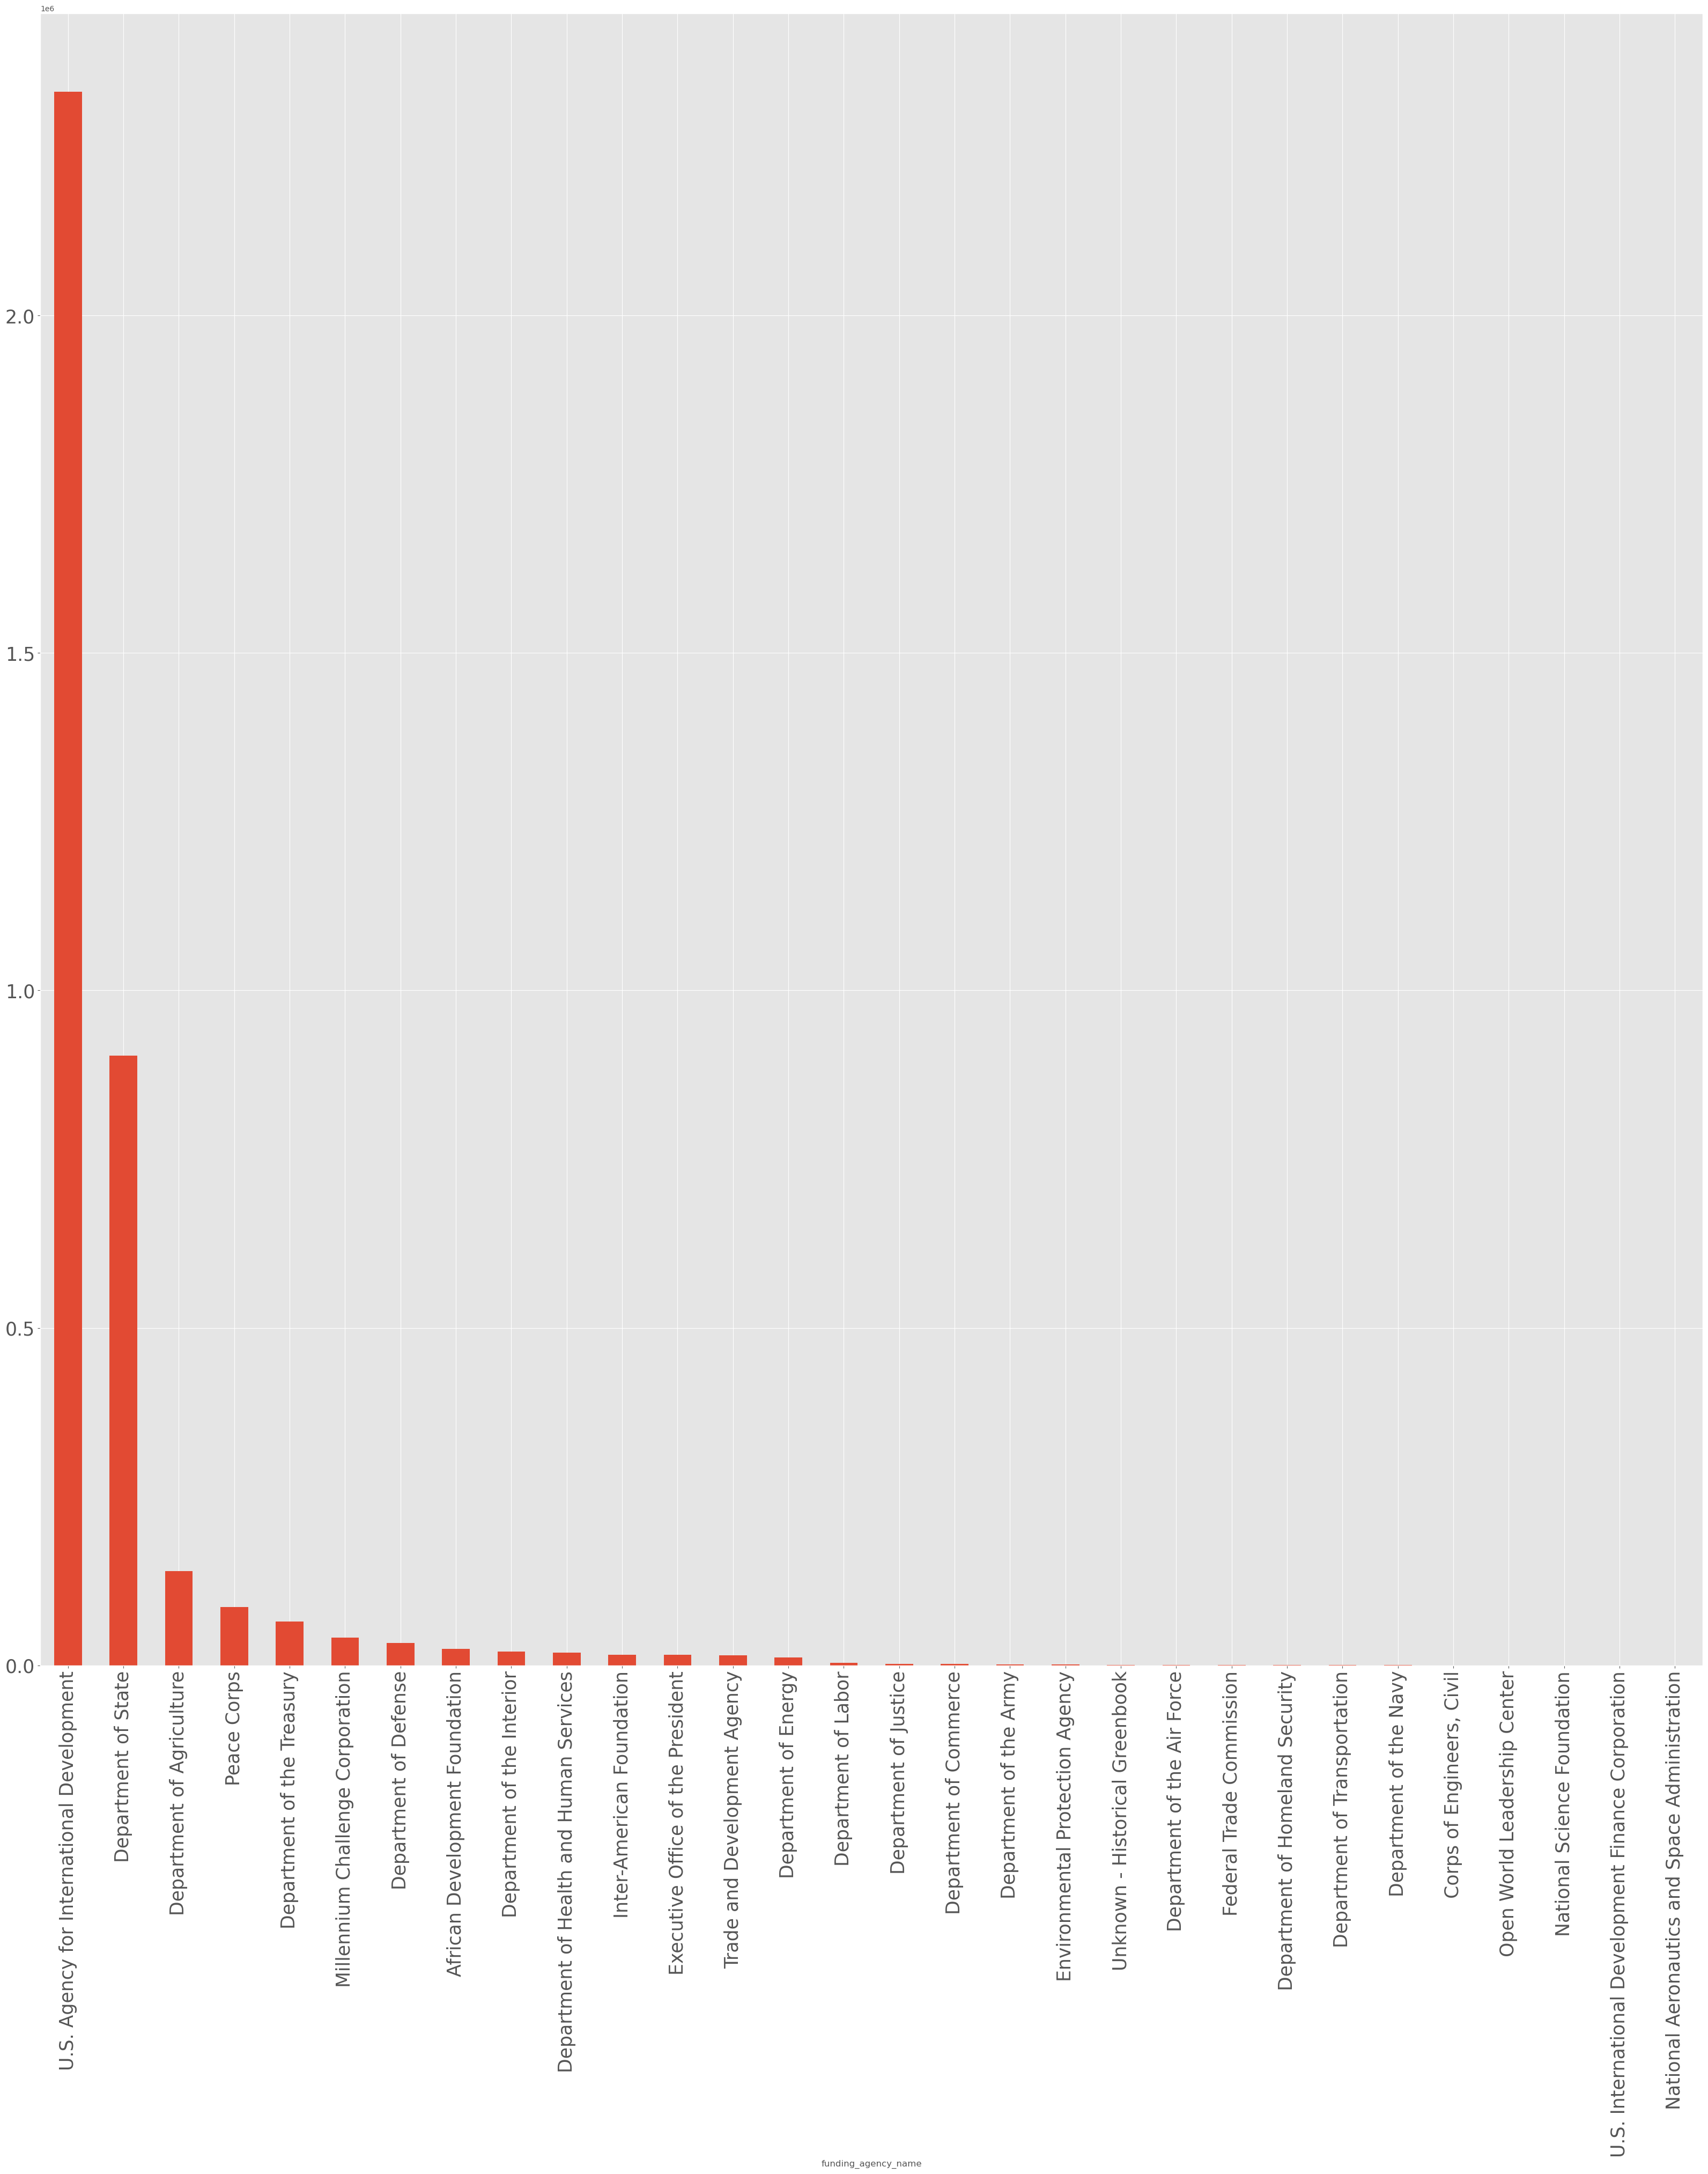

In [19]:
#OK COOL now let's graph stuff
#first counting the number of times each funding agency appears in the dataframe, then plotting a bar chart that captures this information and specifying the size of the figure and font so we can see everything
df.funding_agency_name.value_counts().plot(kind='bar', figsize=(40,40), fontsize=25)
plt.show()

In [20]:
#and if you just want to see the names, here are the top five funding agencies
df.funding_agency_name.value_counts()[:5]

funding_agency_name
U.S. Agency for International Development    2331171
Department of State                           903656
Department of Agriculture                     139314
Peace Corps                                    86710
Department of the Treasury                     64757
Name: count, dtype: int64